In [6]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.cluster import KMeans

In [2]:
image_path="../output_videos/cropped_img.jpg"
image=cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

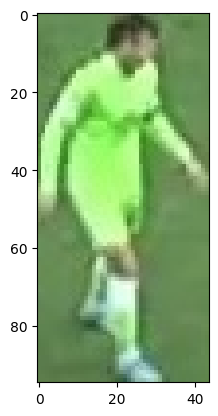

In [3]:
plt.imshow(image)
plt.show()

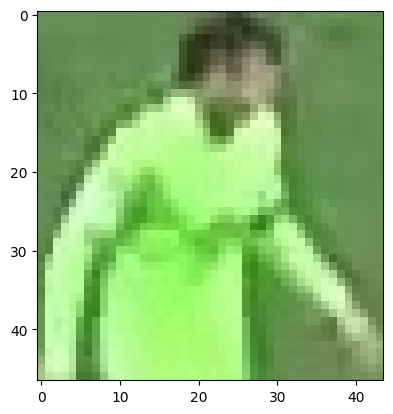

In [5]:
#taking top half of the image
top_half_image=image[0: int(image.shape[0]/2),:]
plt.imshow(top_half_image)
plt.show()

/Users/rohansridhar/miniforge3/envs/google/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


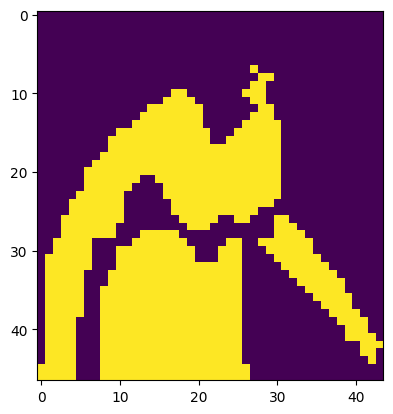

In [8]:
#remove background clustering the image
image_2d=top_half_image.reshape(-1,3)
kmeans=KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)

labels=kmeans.labels_
clustered_image=labels.reshape(top_half_image.shape[0],image.shape[1])

plt.imshow(clustered_image)
plt.show()

In [9]:
corner_clusters=[clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster=max(set(corner_clusters),key=corner_clusters.count)
print(non_player_cluster)

0


In [10]:
player_cluster=1-non_player_cluster
print(player_cluster)

1


In [11]:
kmeans.cluster_centers_[player_cluster]

array([175.41792929, 242.96843434, 139.78535354])